In [88]:
# Importing some basic libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing the dataset
df = pd.read_csv('avocado.csv')

In [3]:
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


So our dataset has 18249 entries and 14 columns

In [4]:
df['AveragePrice'].value_counts()

AveragePrice
1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
3.25      1
3.12      1
2.68      1
3.03      1
3.17      1
Name: count, Length: 259, dtype: int64

So we can see that this is a regression type of problem

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


We donot have any null values

In [6]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

Unnamed: 0
0     432
7     432
1     432
11    432
9     432
8     432
10    432
6     432
5     432
4     432
3     432
2     432
41    324
34    324
35    324
36    324
37    324
38    324
39    324
40    324
47    324
42    324
43    324
44    324
45    324
46    324
32    324
48    324
49    324
50    324
33    324
26    324
31    324
30    324
12    324
13    324
14    324
15    324
16    324
17    324
18    324
19    324
20    324
21    324
22    324
23    324
24    324
25    324
27    324
28    324
29    324
51    322
52    107
Name: count, dtype: int64


Date
2015-12-27    108
2017-12-24    108
2017-12-10    108
2017-12-03    108
2017-11-26    108
             ... 
2016-11-06    108
2018-01-07    108
2017-06-18    107
2017-06-25    107
2015-12-06    107
Name: count, Length: 169, dtype: int64


AveragePrice
1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
3.25      1
3.12      1
2.68      1
3.03      1
3.17      1
Name: count, Length: 259, dtype: int64


T

In [7]:
# In this dataset Unnamed: 0 column has of no use. so we can simply remove this column
df.drop('Unnamed: 0',axis=1,inplace=True)

In [8]:
# lets convert the date column in datetime format and separate this column into three other column in dd,mm and yyyy respectivly

In [9]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
#creating separate columns for day,month and year
df['day'] = df['Date'].dt.day
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year


In [ ]:
# Removing the Date column because we have created separate columns for that column
df.drop('Date',axis=1,inplace =True)

In [11]:
df.nunique()

AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
day                31
month              12
dtype: int64

In [12]:
# checking for duplicate columns. if present the drop this column
df1=df.T.drop_duplicates().T
print(df1)

      AveragePrice Total Volume     4046       4225    4770 Total Bags  \
0             1.33     64236.62  1036.74   54454.85   48.16    8696.87   
1             1.35     54876.98   674.28   44638.81   58.33    9505.56   
2             0.93    118220.22    794.7  109149.67   130.5    8145.35   
3             1.08     78992.15   1132.0   71976.41   72.58    5811.16   
4             1.28      51039.6   941.48   43838.39   75.78    6183.95   
...            ...          ...      ...        ...     ...        ...   
18244         1.63     17074.83  2046.96     1529.2     0.0   13498.67   
18245         1.71     13888.04   1191.7     3431.5     0.0    9264.84   
18246         1.87     13766.76  1191.92    2452.79  727.94    9394.11   
18247         1.93     16205.22  1527.63    2981.04  727.01   10969.54   
18248         1.62     17489.58  2894.77    2356.13  224.53   12014.15   

      Small Bags Large Bags XLarge Bags          type  year            region  \
0        8603.62      93.25   

In [13]:
df=df1

In [14]:
# Dropping all the duplicate rows
df.drop_duplicates(inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   AveragePrice  18249 non-null  object
 1   Total Volume  18249 non-null  object
 2   4046          18249 non-null  object
 3   4225          18249 non-null  object
 4   4770          18249 non-null  object
 5   Total Bags    18249 non-null  object
 6   Small Bags    18249 non-null  object
 7   Large Bags    18249 non-null  object
 8   XLarge Bags   18249 non-null  object
 9   type          18249 non-null  object
 10  year          18249 non-null  object
 11  region        18249 non-null  object
 12  day           18249 non-null  object
 13  month         18249 non-null  object
dtypes: object(14)
memory usage: 1.9+ MB


In [16]:
df.isnull().sum()

AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
day             0
month           0
dtype: int64

In [17]:
#transforming datatypes from object to numeric datatype by using OrdianlEncoder
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()

In [18]:
for i in df.columns:
    if df.dtypes[i] == 'object':
        df[i]=OE.fit_transform(df[i].values.reshape(-1,1))

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  float64
 10  year          18249 non-null  float64
 11  region        18249 non-null  float64
 12  day           18249 non-null  float64
 13  month         18249 non-null  float64
dtypes: float64(14)
memory usage: 1.9 MB


In [20]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,day,month
count,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000
mean,93.595265,9114.688312,8601.745356,8984.864376,4029.833142,8982.184777,8263.606115,6261.255850,893.316894,0.499918,1.147899,26.495644,14.662612,5.177215
std,40.253995,5265.433348,5232.888735,5258.854866,3996.027809,5253.461654,5168.860788,4852.398211,1569.392283,0.500014,0.939938,15.583788,8.776281,3.534130
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,63.000000,4554.000000,4032.000000,4426.000000,0.000000,4414.000000,3651.000000,1479.000000,0.000000,0.000000,0.000000,13.000000,7.000000,2.000000
50%,90.000000,9113.000000,8579.000000,8979.000000,2993.000000,8973.000000,8199.000000,5969.000000,0.000000,0.000000,1.000000,26.000000,15.000000,5.000000
75%,119.000000,13675.000000,13139.000000,13540.000000,7508.000000,13534.000000,12758.000000,10520.000000,1270.000000,1.000000,2.000000,40.000000,22.000000,8.000000
max,258.000000,18236.000000,17701.000000,18102.000000,12070.000000,18096.000000,17320.000000,15081.000000,5587.000000,1.000000,3.000000,53.000000,30.000000,11.000000


So we can see that XLarge Bags col has skewness

In [21]:
df.skew()

AveragePrice    0.577300
Total Volume    0.000753
4046            0.016272
4225            0.003850
4770            0.510735
Total Bags      0.007023
Small Bags      0.048568
Large Bags      0.188522
XLarge Bags     1.610157
type            0.000329
year            0.215339
region          0.000030
day             0.014310
month           0.106617
dtype: float64

XLarge Bags column has little skewness so we need to remove this

In [22]:
# Plotting distplot

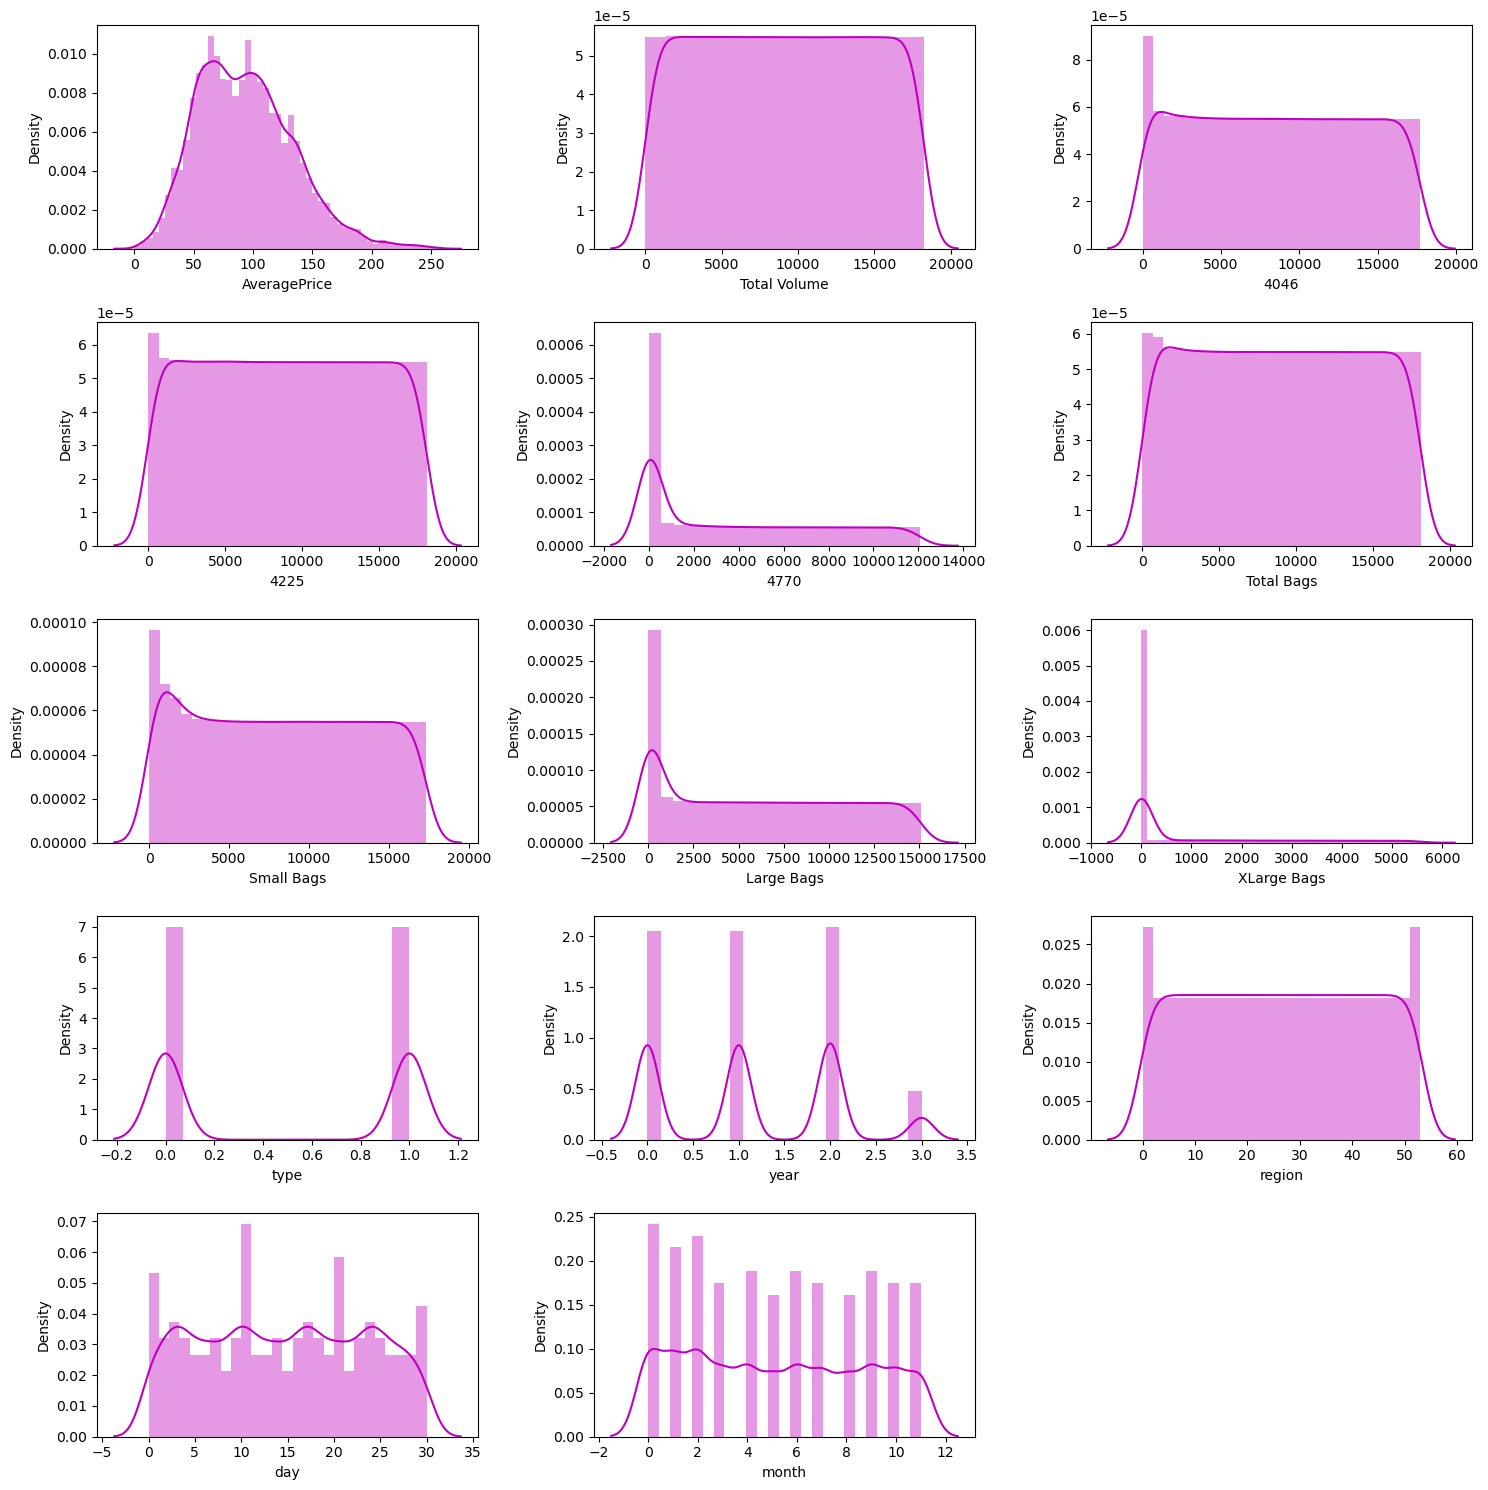

In [23]:
plt.figure(figsize=(15,15),facecolor='white')
p=1
for i in df.columns:
    if p<=14:
        ax=plt.subplot(5,3,p)
        sns.distplot(df[i],color='m')
        plt.xlabel(i)
    p+=1
plt.tight_layout()

In [24]:
# Removing skewness by using cuberoot technique

In [25]:
df['XLarge Bags']=np.cbrt(df['XLarge Bags'])

In [26]:
df.skew()

AveragePrice    0.577300
Total Volume    0.000753
4046            0.016272
4225            0.003850
4770            0.510735
Total Bags      0.007023
Small Bags      0.048568
Large Bags      0.188522
XLarge Bags     0.949071
type            0.000329
year            0.215339
region          0.000030
day             0.014310
month           0.106617
dtype: float64

In [27]:
# Plotting boxplot

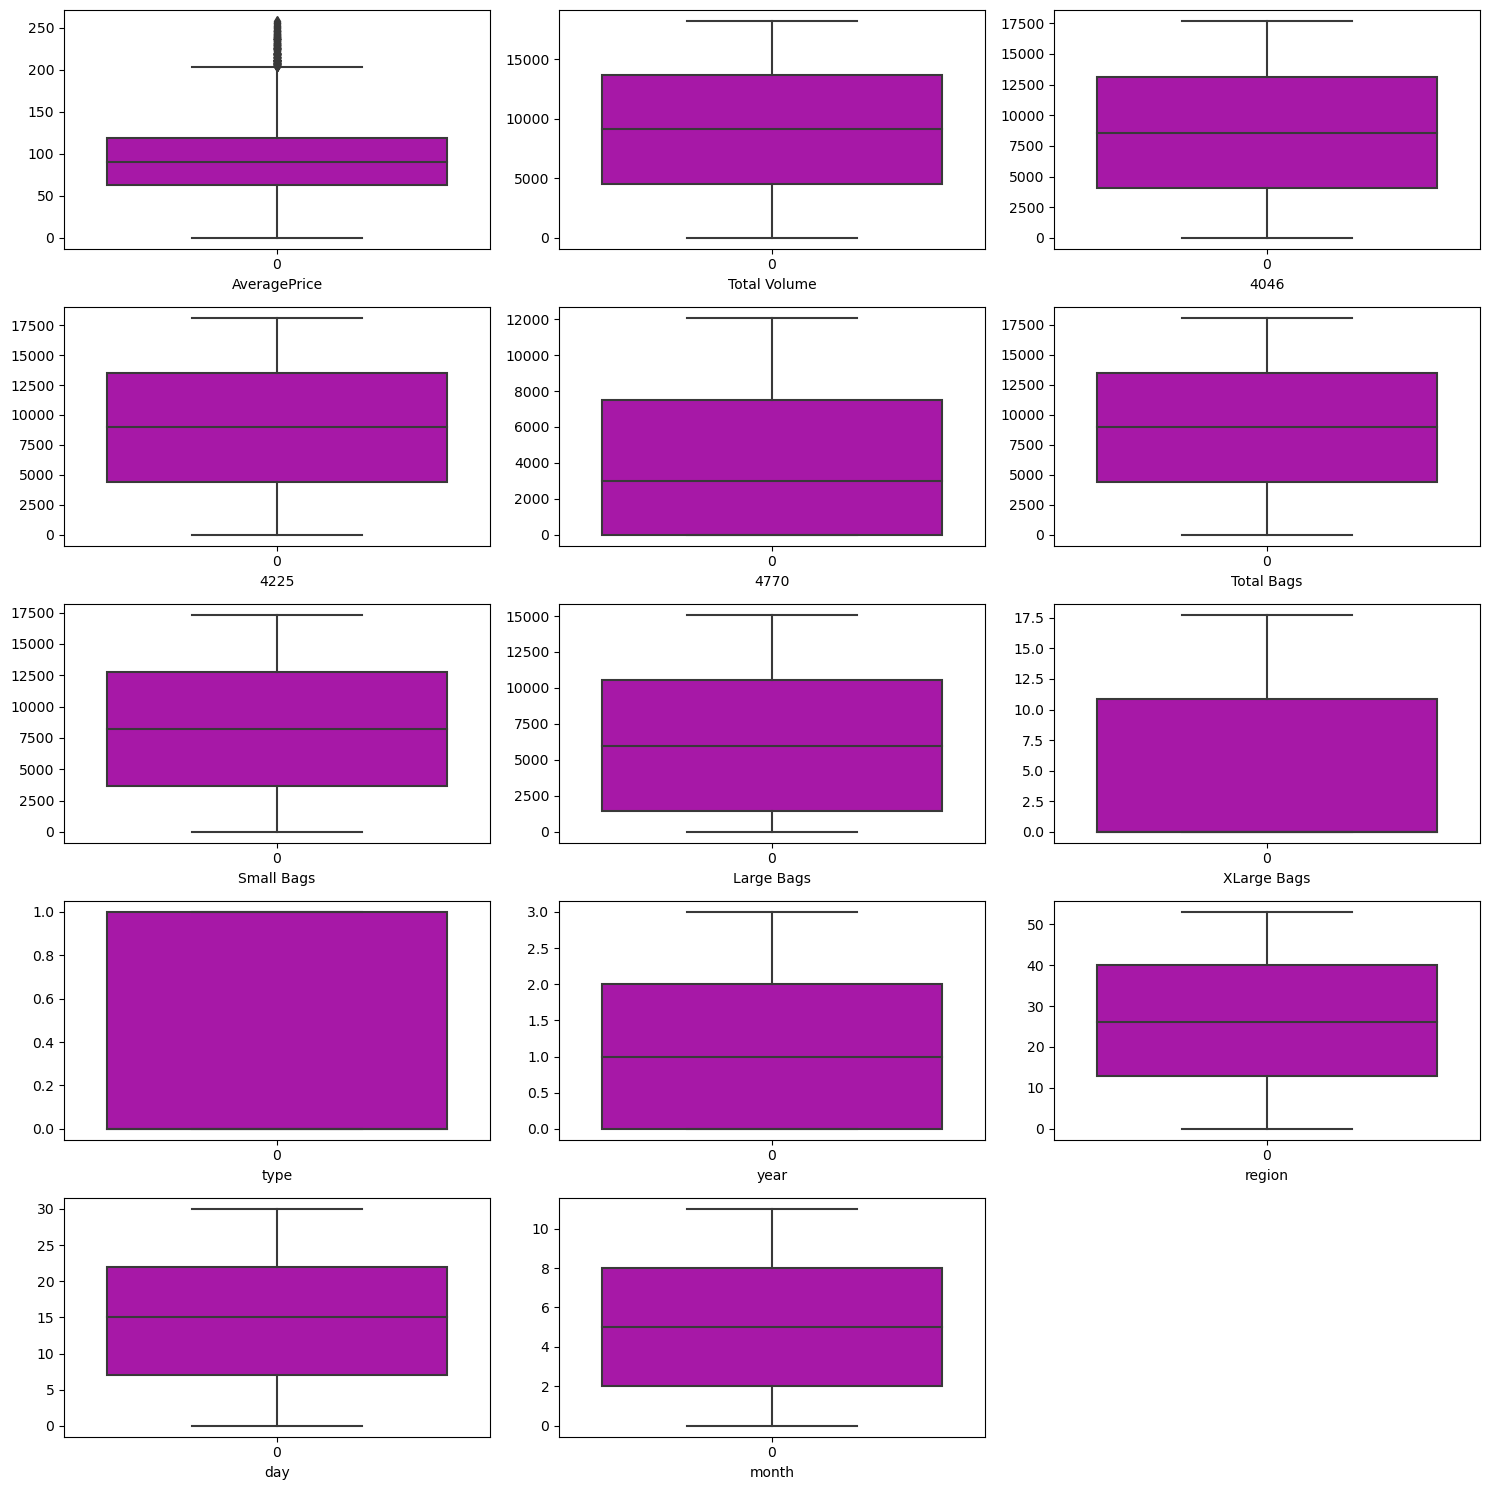

In [28]:
plt.figure(figsize=(15,15),facecolor='white')
p=1
for i in df.columns:
    if p<=14:
        ax=plt.subplot(5,3,p)
        sns.boxplot(df[i],color='m')
        plt.xlabel(i)
    p+=1
plt.tight_layout()

by analysing the boxpolt we can see that Average price columns has outliers 

In [29]:
# plotting regplot to check the linear relationship between the column Average price and all the columns 

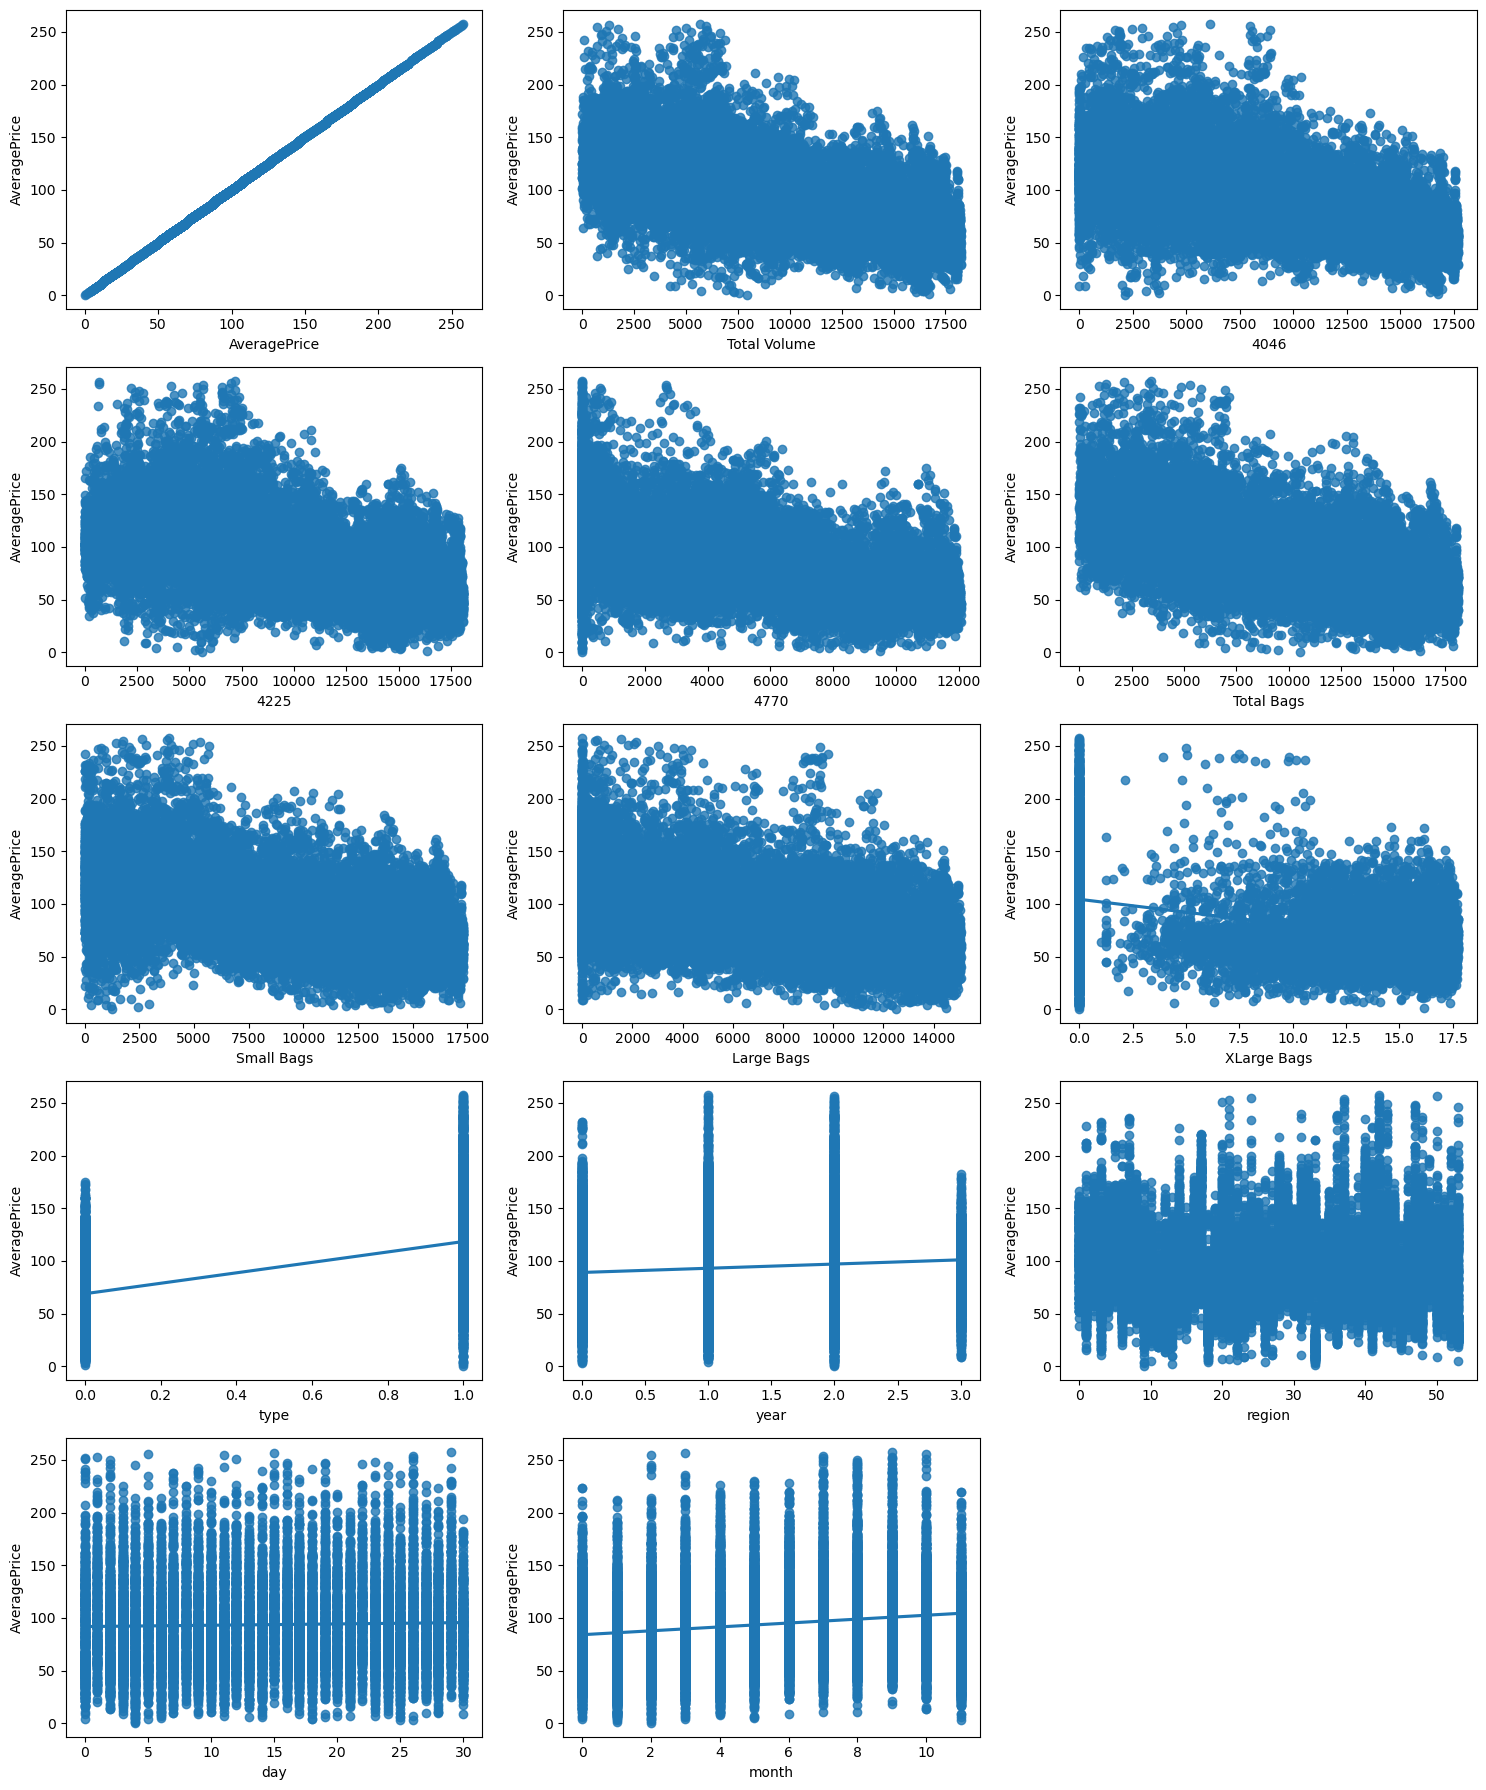

In [30]:
plt.figure(figsize=(15,18),facecolor='white')
p=1
for i in df.columns:
    if p<=14:
        ax=plt.subplot(5,3,p)
        sns.regplot(y='AveragePrice',x=i,data =df)
        plt.xlabel(i)
    p+=1
plt.tight_layout()

In [31]:
# checking the correlation between the columns
corr = df.corr()
corr

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,day,month
AveragePrice,1.000000,-0.589341,-0.570148,-0.490201,-0.513770,-0.581311,-0.525067,-0.498835,-0.395010,0.615982,0.093216,-0.011796,0.027363,0.162413
Total Volume,-0.589341,1.000000,0.903278,0.940148,0.810884,0.952844,0.928842,0.708302,0.651286,-0.808491,0.085824,0.095988,-0.010503,-0.035493
4046,-0.570148,0.903278,1.000000,0.793995,0.741457,0.838443,0.826777,0.647191,0.606865,-0.748193,0.011444,0.184896,-0.008767,-0.034158
4225,-0.490201,0.940148,0.793995,1.000000,0.801623,0.857661,0.838541,0.639056,0.622430,-0.780779,0.006278,0.068547,-0.009521,-0.032171
4770,-0.513770,0.810884,0.741457,0.801623,1.000000,0.757695,0.767877,0.554446,0.658731,-0.748100,-0.055180,0.050078,-0.005098,-0.032137
Total Bags,-0.581311,0.952844,0.838443,0.857661,0.757695,1.000000,0.962575,0.758396,0.644726,-0.754928,0.205703,0.098432,-0.006285,-0.025145
Small Bags,-0.525067,0.928842,0.826777,0.838541,0.767877,0.962575,1.000000,0.612231,0.637472,-0.757381,0.180780,0.094037,-0.003366,-0.021219
Large Bags,-0.498835,0.708302,0.647191,0.639056,0.554446,0.758396,0.612231,1.000000,0.500306,-0.527684,0.180002,0.121728,-0.005700,-0.027568
XLarge Bags,-0.395010,0.651286,0.606865,0.622430,0.658731,0.644726,0.637472,0.500306,1.000000,-0.656502,0.166947,0.013723,0.005554,0.005465
type,0.615982,-0.808491,-0.748193,-0.780779,-0.748100,-0.754928,-0.757381,-0.527684,-0.656502,1.000000,-0.000032,-0.000280,-0.000013,-0.000085


<Axes: >

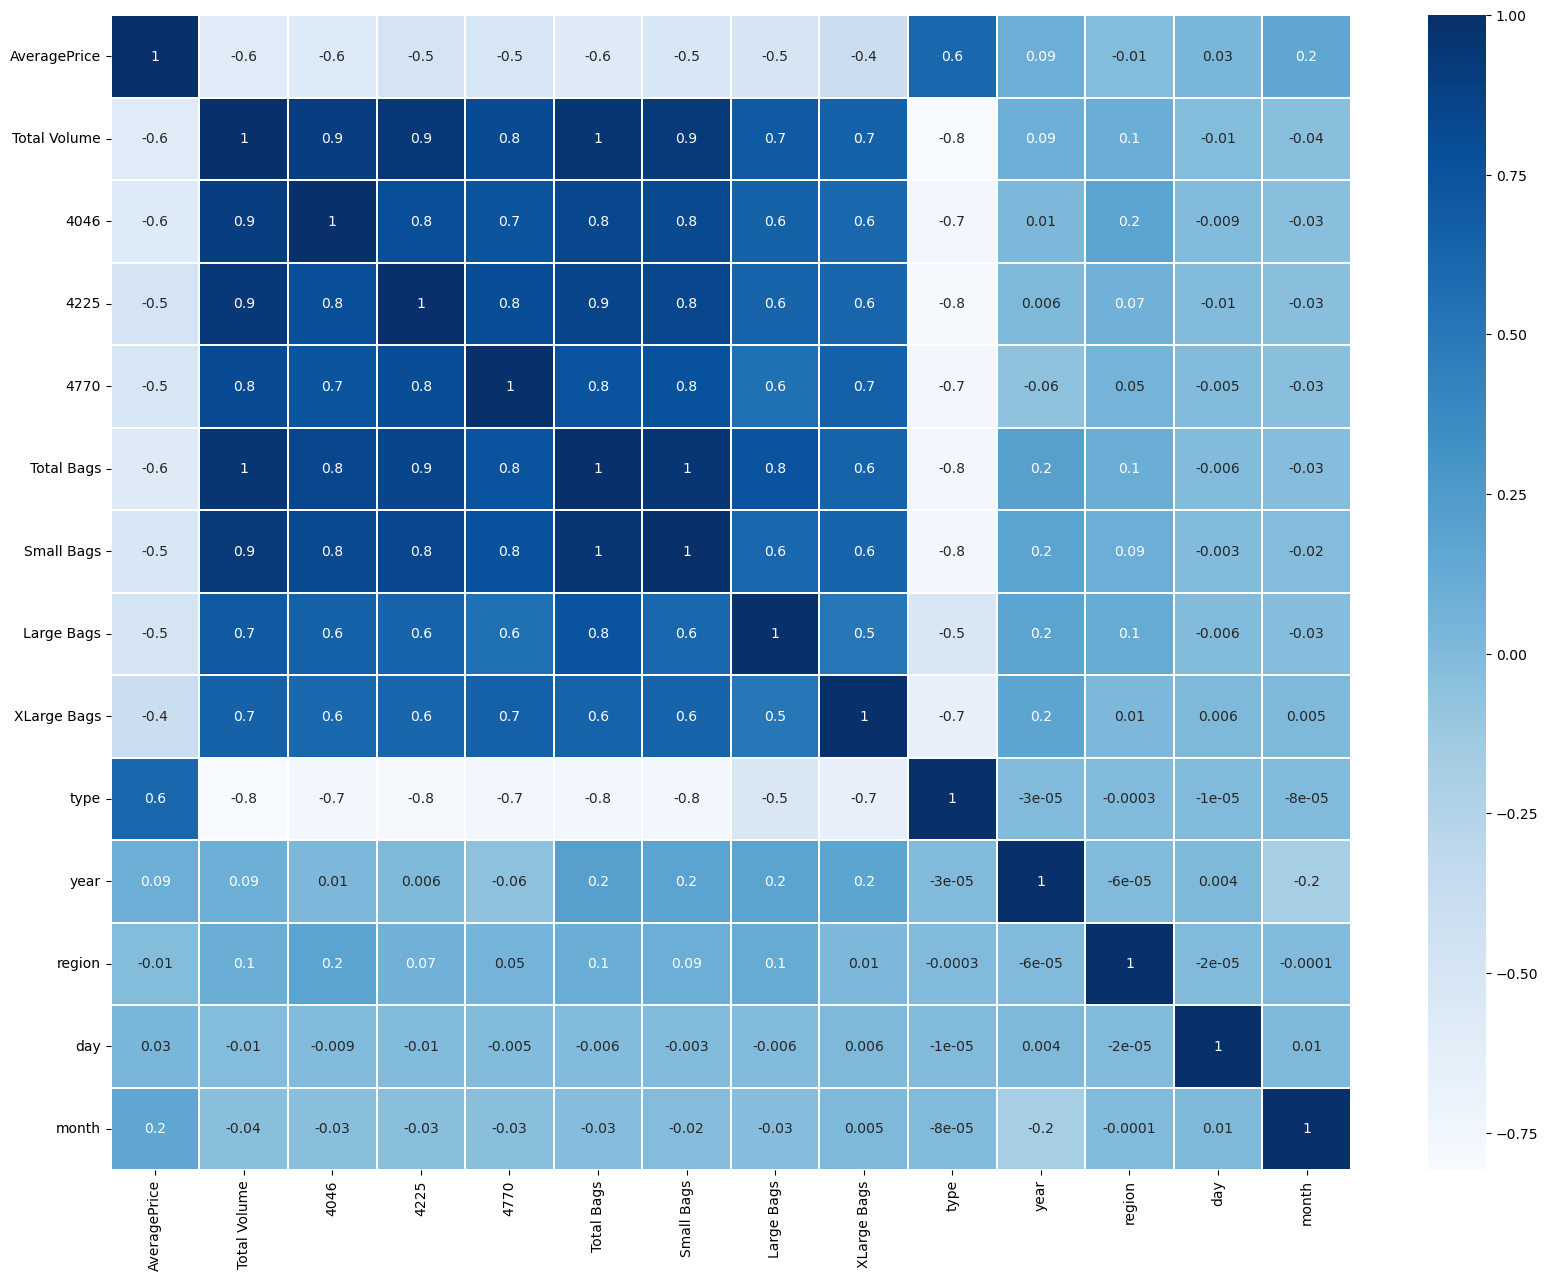

In [32]:
# creating the heatmap 
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),linewidths=.1,fmt='.1g',annot=True,cmap="Blues")

Total volume column has very high multicolinearity with most of the column

In [33]:
# checking the relation with the target column
corr['AveragePrice'].sort_values(ascending=False)

AveragePrice    1.000000
type            0.615982
month           0.162413
year            0.093216
day             0.027363
region         -0.011796
XLarge Bags    -0.395010
4225           -0.490201
Large Bags     -0.498835
4770           -0.513770
Small Bags     -0.525067
4046           -0.570148
Total Bags     -0.581311
Total Volume   -0.589341
Name: AveragePrice, dtype: float64

Except day,year,month and region all columns has very high correlation with the AveragePrice column

In [34]:
# Separating x and y

In [35]:
x=df.drop('AveragePrice',axis=1)
y=df['AveragePrice']

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# checking the VIF 
ds=pd.DataFrame()
ds['Columns']=x.columns
ds['vif']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
ds

,Columns,vif
0,Total Volume,243.935755
1,4046,31.021667
2,4225,53.966301
3,4770,7.570906
4,Total Bags,207.866303
5,Small Bags,96.183701
6,Large Bags,12.063027
7,XLarge Bags,3.209145
8,type,3.350685
9,year,3.355392


column Total volume and total bags has very high vif values

In [37]:
#x.drop('Total Volume',axis=1,inplace=True)

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# checking the VIF 
ds=pd.DataFrame()
ds['Columns']=x.columns
ds['vif']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
ds

,Columns,vif
0,Total Volume,243.935755
1,4046,31.021667
2,4225,53.966301
3,4770,7.570906
4,Total Bags,207.866303
5,Small Bags,96.183701
6,Large Bags,12.063027
7,XLarge Bags,3.209145
8,type,3.350685
9,year,3.355392


In [39]:
# Dropping Total Bags column

In [40]:
#x.drop('Total Bags',axis=1,inplace=True)
#x.drop('day',axis=1,inplace=True)

In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# checking the VIF 
ds=pd.DataFrame()
ds['Columns']=x.columns
ds['vif']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
ds

,Columns,vif
0,Total Volume,243.935755
1,4046,31.021667
2,4225,53.966301
3,4770,7.570906
4,Total Bags,207.866303
5,Small Bags,96.183701
6,Large Bags,12.063027
7,XLarge Bags,3.209145
8,type,3.350685
9,year,3.355392


In [42]:
#x.drop('Small Bags',axis=1,inplace=True)
#x.drop('Large Bags',axis=1,inplace=True)
#x.drop('XLarge Bags',axis=1,inplace=True)
#x.drop('Total Volume',axis=1,inplace=True)

In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# checking the VIF 
ds=pd.DataFrame()
ds['Columns']=x.columns
ds['vif']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
ds

,Columns,vif
0,Total Volume,243.935755
1,4046,31.021667
2,4225,53.966301
3,4770,7.570906
4,Total Bags,207.866303
5,Small Bags,96.183701
6,Large Bags,12.063027
7,XLarge Bags,3.209145
8,type,3.350685
9,year,3.355392


In [44]:
# Standard Scaling
from sklearn.preprocessing import StandardScaler
st= StandardScaler()
x=pd.DataFrame(st.fit_transform(x),columns=x.columns)
x

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,day,month
0,-0.224810,-0.806220,0.358859,-0.658130,-0.609555,-0.480120,-1.029881,-0.677487,-0.999836,-1.221282,-1.700252,1.291857,1.647632
1,-0.279128,-0.952797,0.233543,-0.615586,-0.565202,-0.443361,-1.024935,-0.677487,-0.999836,-1.221282,-1.700252,0.494231,1.647632
2,0.051908,-0.900244,0.737659,-0.378845,-0.640773,-0.510495,-1.016691,-0.677487,-0.999836,-1.221282,-1.700252,-0.303396,1.647632
3,-0.140674,-0.775261,0.526010,-0.560781,-0.810000,-0.654631,-0.978565,-0.677487,-0.999836,-1.221282,-1.700252,-1.101022,1.647632
4,-0.299070,-0.841001,0.222894,-0.549019,-0.782017,-0.634317,-0.908082,-0.677487,-0.999836,-1.221282,-1.700252,1.519750,1.364669
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,-0.643020,-0.533514,-1.102336,-1.008487,-0.418247,-0.312574,-0.738883,-0.677487,1.000164,1.970504,1.700811,-1.328915,-1.181997
18245,-0.737222,-0.754622,-0.803974,-1.008487,-0.576242,-0.464255,-0.808129,-0.677487,1.000164,1.970504,1.700811,1.405803,-1.464959
18246,-0.742920,-0.754431,-0.961617,0.170716,-0.570532,-0.445489,-1.121797,-0.677487,1.000164,1.970504,1.700811,0.608177,-1.464959
18247,-0.664482,-0.653337,-0.871481,0.170215,-0.499148,-0.382997,-1.104691,-0.677487,1.000164,1.970504,1.700811,-0.189449,-1.464959


In [45]:
# I used Pca before but i didnot get that much accuracy so i skipped it

In [46]:
#from sklearn.decomposition import PCA
#pca=PCA(n_components=8)


In [47]:
#df1=pca.fit_transform(x)

In [48]:
#x = pd.DataFrame(data = df1, columns = ['pca1', 'pca2','pca3','pca4'])


In [49]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

In [50]:
maxacc=0
maxrs=0
for i in range(200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    RFR=RandomForestRegressor(n_jobs=-1)
    RFR.fit(x_train,y_train)
    pred=RFR.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxacc:
        maxacc=acc
        maxrs=i

print('max accuracy is :',maxacc,'random state :',maxrs)  



max accuracy is : 0.9021274670841647 random state : 41


In [51]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=maxrs)

In [89]:
# making the copies. for doing the feature selection process

In [52]:
x_train1,x_test1,y_train1,y_test1=x_train.copy(),x_test.copy(),y_train.copy(),y_test.copy()

In [90]:
# importing cross_val_score

In [55]:
from sklearn.model_selection import cross_val_score

In [91]:
# Importing exhaustive feature selector from mlxtend

In [56]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

In [57]:
from sklearn.ensemble import RandomForestRegressor

In [93]:
# Importing sequential feature selector from mlxtend

In [61]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [92]:
# Creating our base model by using random forest regressor

In [62]:
RFR = RandomForestRegressor()
sfs = SFS(RFR, k_features='best', forward=True, floating=False, scoring='r2',cv=5)

sfs.fit(x_train1, y_train1)

SequentialFeatureSelector(estimator=RandomForestRegressor(), k_features=(1, 13),
                          scoring='r2')

In [94]:
# checking for the best columns by the algorithmn

In [63]:
sfs.k_feature_idx_

(0, 1, 2, 4, 5, 7, 8, 9, 10, 12)

In [2]:
#new_features = sfs.get_support(indices=False)

# Get the names of the selected features
#selected_columns = x.columns[new_features]

So we get 10 best columns 

In [64]:
metric_df = pd.DataFrame.from_dict(sfs.get_metric_dict()).T
metric_df

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(8,)","[0.3700358358207262, 0.39452368949865735, 0.36...",0.376014,"(type,)",0.01259,0.009795,0.004898
2,"(8, 10)","[0.58668869850547, 0.5837363764856709, 0.56573...",0.578507,"(type, region)",0.009866,0.007676,0.003838
3,"(8, 9, 10)","[0.6382566502884213, 0.6576326751782802, 0.629...",0.645166,"(type, year, region)",0.012995,0.010111,0.005055
4,"(8, 9, 10, 12)","[0.8326691525017011, 0.8371798359474277, 0.817...",0.828538,"(type, year, region, month)",0.009709,0.007554,0.003777
5,"(0, 8, 9, 10, 12)","[0.8743247324640815, 0.8845901174063137, 0.868...",0.876376,"(Total Volume, type, year, region, month)",0.006817,0.005304,0.002652
6,"(0, 2, 8, 9, 10, 12)","[0.8795994477549978, 0.8832790487834896, 0.871...",0.877183,"(Total Volume, 4225, type, year, region, month)",0.005404,0.004205,0.002102
7,"(0, 1, 2, 8, 9, 10, 12)","[0.878219305829324, 0.8782294264353017, 0.8788...",0.879398,"(Total Volume, 4046, 4225, type, year, region,...",0.001603,0.001248,0.000624
8,"(0, 1, 2, 5, 8, 9, 10, 12)","[0.8812894466110124, 0.8841965460844922, 0.878...",0.882442,"(Total Volume, 4046, 4225, Small Bags, type, y...",0.003635,0.002828,0.001414
9,"(0, 1, 2, 4, 5, 8, 9, 10, 12)","[0.8855744007240556, 0.8892905847742759, 0.885...",0.886534,"(Total Volume, 4046, 4225, Total Bags, Small B...",0.001881,0.001463,0.000732
10,"(0, 1, 2, 4, 5, 7, 8, 9, 10, 12)","[0.8844551982724482, 0.8903390390960453, 0.886...",0.886636,"(Total Volume, 4046, 4225, Total Bags, Small B...",0.002547,0.001982,0.000991


In [95]:
# Plotting the performance vs number of features

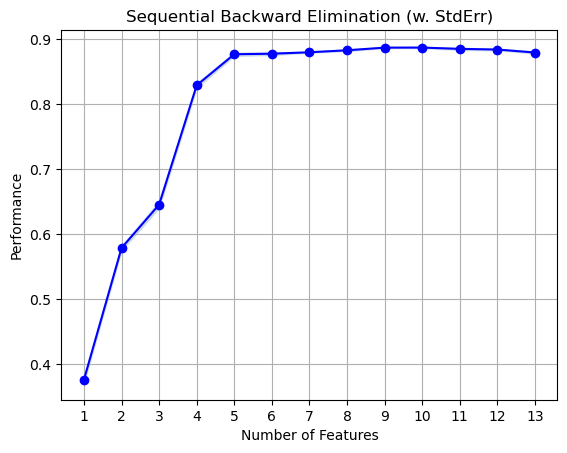

In [65]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs


fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_err',)

plt.title('Sequential Backward Elimination (w. StdErr)')
plt.grid()
plt.show()

In [96]:
# transforming our test and train dataset for 10 no of columns

In [68]:
x_train_sel = sfs.transform(x_train1)
x_test_sel = sfs.transform(x_test1)

model = RandomForestRegressor()

print("training",np.mean(cross_val_score(model, x_train_sel, y_train, cv=5, scoring='r2')))
print("testing",np.mean(cross_val_score(model, x_test_sel, y_test, cv=5, scoring='r2')))

training 0.8854561605947889
testing 0.8023249715324059


In [97]:
# Importing some basic regression algorithmns 

In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [98]:
# Making their instances

In [70]:
LR=LinearRegression()
RD=Ridge()
LS=Lasso()
EN=ElasticNet()
svr=SVR()
DTR = DecisionTreeRegressor()
GB=GradientBoostingRegressor()
RFR=RandomForestRegressor()

In [71]:
loop=[LR,RD,LS,EN,svr,DTR,GB,RFR]

In [99]:
# Running the loop for all algos and comparing their metrices with the cross_val_score

In [74]:
for i in loop:
    i.fit(x_train_sel,y_train)
    pred=i.predict(x_test_sel)
    print('This is for :',i)
    print('r2_score will be :',r2_score(y_test,pred))
    print('mean abs error will be :',mean_absolute_error(y_test,pred))
    print('mean squared error will be :',mean_squared_error(y_test,pred))
    print('root mean squared error will be :',np.sqrt(mean_squared_error(y_test,pred)))
    print('\n')
    score=cross_val_score(i,x_train_sel,y_train,cv=5)
    print(score)
    print('mean CV :',score.mean())
    print("difference between mean CV and r2_score will be :",r2_score(y_test,pred)-score.mean())
    print('\n')

This is for : LinearRegression()
r2_score will be : 0.5639010368038244
mean abs error will be : 21.095194554042394
mean squared error will be : 739.5775532233197
root mean squared error will be : 27.19517518280255


[0.54202367 0.56042762 0.56263469 0.53891918 0.55419493]
mean CV : 0.5516400186473941
difference between mean CV and r2_score will be : 0.012261018156430326


This is for : Ridge()
r2_score will be : 0.5638867444764641
mean abs error will be : 21.09540851763372
mean squared error will be : 739.6017914935087
root mean squared error will be : 27.195620814636843


[0.54203125 0.56043002 0.56260255 0.53894237 0.55419843]
mean CV : 0.551640924311752
difference between mean CV and r2_score will be : 0.012245820164712096


This is for : Lasso()
r2_score will be : 0.5006932969914073
mean abs error will be : 22.441179071917137
mean squared error will be : 846.7711709577763
root mean squared error will be : 29.09933282667794


[0.48304246 0.50399745 0.49551996 0.48726528 0.49512374]


In [75]:
# Here RandomForestRegressor model has the best performance and less overfitting. Because the differencr between the mean cross_val_score and the r2_score is minimum

In [76]:
# Lets do the hyper parameter tuning by using grid search cv

In [77]:
from sklearn.model_selection import GridSearchCV

In [78]:
parameters = {'n_estimators': [100,150, 200, 250, 300],'max_depth': [None, 10, 20, 30, 40, 50],'min_samples_split': [2,3,5,7,10],'min_samples_leaf': [1,2,3,4],'bootstrap': [True, False]}

In [82]:
GCV=GridSearchCV(RandomForestRegressor(n_jobs=-1),parameters,cv=5,n_jobs=-1)

In [ ]:
GCV.fit(x_train_sel,y_train)

In [3]:
# It was taking more than 2 hours. so I cancelled it

In [4]:
# checking the best parameters obtained from Grid Search CV

In [ ]:
GCV.best_params_

In [5]:
# Building the model based on the best parameters 

In [86]:
final_model=RandomForestRegressor(n_jobs=-1)
final_model.fit(x_train_sel,y_train)
pred=final_model.predict(x_test_sel)
acc= r2_score(y_test,pred)
print(acc*100)

90.22843058929892


In [87]:
# Lets save our model
import joblib
filename = 'avocado_price.pkl'
joblib.dump(final_model, filename)
model = joblib.load(filename)